In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import sys

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

In [8]:
#Load the data to a data frame from the csv file with dummy genre variables and title,plot
Model_DF=pd.read_csv('Model_DF.csv')

In [9]:
Model_DF.columns

Index(['Title', 'Plot', 'Action', 'Adventure', 'Thriller', 'Drama', 'Musical',
       'History', 'Comedy', 'Crime', 'Animation', 'Horror', 'SciFi', 'Romance',
       'Fantasy', 'Sport'],
      dtype='object')

In [ ]:
#Plot the most frequent words in the plots

In [10]:
#split the plots into words
plot = Model_DF['Plot'].str.cat(sep=' ').lower().strip()

In [11]:
#identify the frequent words
tokens = word_tokenize(plot)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)

35122


In [12]:
#Remove the punctuations from the words list
tokens = [word for word in tokens if word.isalpha()]
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)

31492


In [13]:
#Further clean up the text by removing the stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)

31358


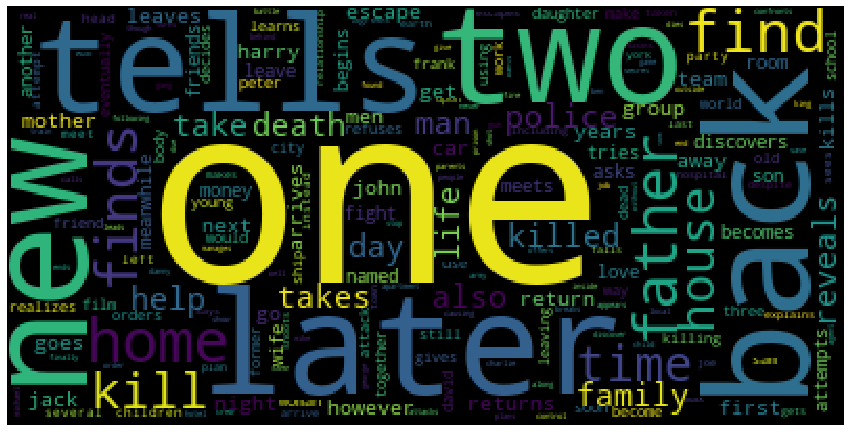

In [14]:
#Plot the frequent words
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
#List of models to be used for the text analysis
models = {
    "SVC": svm.SVC(kernel="linear"),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier()
}

In [33]:
#Train and evaluate the models for all identified genre's
X= Model_DF.Plot.fillna(' ')
accuracy=[]
model_used=[]
genre_column=[]
for col in Model_DF.columns:
    if col!='Plot' and col!='Title':
        y= Model_DF[col]
        xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size = 0.25,random_state=1905)
        vect = CountVectorizer()
        X_train_df = vect.fit_transform(xtrain)
        X_test_df = vect.transform(xtest)
        prediction = dict()
        score_map = {}
        max_score=0
        most_accurate_model=''
        for model_name in models:
            model = models[model_name]
            model.fit(X_train_df,ytrain)
            prediction[model_name] = model.predict(X_test_df)
            score = accuracy_score(ytest, prediction[model_name])
            score_map[model_name] = score
            if score>max_score:
                max_score=score
                most_accurate_model=model_name
        accuracy.append(max_score)
        model_used.append(most_accurate_model)
        genre_column.append(col)
DF=pd.DataFrame()
DF['Model']=model_used
DF['AccuracyScore']=accuracy
DF['Genre']=genre_column      

In [34]:
#Display the most accurate models for all genres
DF

,Model,AccuracyScore,Genre
0,MultinomialNB,0.817416,Action
1,MultinomialNB,0.837079,Adventure
2,LogisticRegression,0.800562,Thriller
3,BaggingClassifier,0.710674,Drama
4,SVC,0.980337,Musical
5,MultinomialNB,0.915730,History
6,MultinomialNB,0.786517,Comedy
7,MultinomialNB,0.853933,Crime
8,SVC,0.969101,Animation
9,SVC,0.941011,Horror


In [64]:
#Set the new data to predict 
new_df1=Model_DF.sample(n=10)
new_df=new_df1[['Title','Plot']]
predict_df=new_df.Plot.fillna(' ')

In [65]:
#Predict the genre for new plots - To test the code, we randomly picked 10 records from the original dataset
prediction=pd.DataFrame()
prediction['Title']=new_df['Title']
DF_predicted=pd.DataFrame()
for row in range(len(DF)):
    col=DF['Genre'].iloc[row]
    y= Model_DF[col]
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size = 0.25,random_state=1905)
    vect = CountVectorizer()
    X_train_df = vect.fit_transform(xtrain)
    output = vect.transform(predict_df)
    model_name=DF['Model'].iloc[row]
    model.fit(X_train_df,ytrain)
    prediction[col] = model.predict(output)
    

In [66]:
#Append Genre to the new plots dataset
Genre=[]
for i in range(len(prediction)):
    a=prediction.columns[(prediction == 1).iloc[i]].tolist()
    start = str(a).find("[")
    end = str(a).find("]")
    substr = str(a)[start+1:end]
    Genre.append(substr)
new_df['Genre']=Genre

In [67]:
#Display the results
new_df

,Title,Plot,Genre
824,disturbia,Troubled by the death of his father (Matt Crav...,"'Drama', 'Comedy'"
1034,argo,"On November 4, 1979, Iranian activists storm t...","'Thriller', 'Drama', 'History'"
273,get shorty,"Chili Palmer, a loan shark based in Miami, cla...","'Thriller', 'Comedy', 'Crime'"
134,forever young,"In 1939, Captain Daniel McCormick (Mel Gibson)...",'Drama'
1104,elysium,"In 2154, Earth is overpopulated and polluted. ...","'Action', 'Drama', 'SciFi'"
30,look who's talking too,The movie picks up with the now married Mollie...,"'Drama', 'Comedy', 'Romance'"
965,blue valentine,The film is presented in a nonlinear narrative...,"'Drama', 'Romance'"
877,revolutionary road,"In 1948, Frank Wheeler (DiCaprio) meets April ...","'Drama', 'Romance'"
492,what women want,Nick Marshall is a Chicago advertising executi...,"'Comedy', 'Romance', 'Fantasy'"
427,star wars: episode i - the phantom menace,NaN,
